# Analise da base de dados de vendas *AdventureWorks*

## Importação dos pacotes e do arquivo xlsx

In [2]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sn

In [3]:
#Criando nosso DataFrame
df_aw = pd.read_excel("AdventureWorks.xlsx")

## Interações básicas com o dataframe

In [4]:
#Visualizando as 5 primeiras linhas
df_aw.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [5]:
#Quantidade de linhas e colunas
df_aw.shape

(904, 16)

In [6]:
#Verificando os tipos de dados
df_aw.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

##  Verificando os valores de venda e obtendo valores de custo e lucro

In [7]:
# Verificandoi a Receita total!
df_aw["Valor Venda"].sum()

5984606.1426

In [8]:
# Obtendo o custo total:
# custo = custo_unitario x quantidade
# custo_total = custo.sum()
df_aw["custo"] = df_aw["Custo Unitário"].mul(df_aw["Quantidade"]) #Criando a coluna de custo

In [9]:
df_aw.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [10]:
# Calculando o custo Total com 2 casas decimais!
round(df_aw["custo"].sum(), 2)

2486783.05

In [11]:
# Obtendo o Lucro total:
# Lucro = Receita - Custo
# Lucro total = lucro.sum()
df_aw["lucro"]  = df_aw["Valor Venda"] - df_aw["custo"] 

In [12]:
df_aw.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [13]:
#Total Lucro
round(df_aw["lucro"].sum(),2)

3497823.09

## Criação da coluna total de dias para calculo do tempo de envio dos produtos

In [14]:
# Criando a coluna com total de dias
df_aw["Tempo_envio"] = df_aw["Data Envio"] - df_aw["Data Venda"]

In [15]:
df_aw.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [16]:
# Extraindo apenas os dias da coluna Tempo_envio (retorna o tipo int64)
df_aw["Tempo_envio"] = (df_aw["Data Envio"] - df_aw["Data Venda"]).dt.days

In [17]:
df_aw.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [18]:
# Verificando o tipo da coluna Tempo_envio
df_aw["Tempo_envio"].dtype

dtype('int64')

In [19]:
# Média do tempo de envio por Marca
df_aw.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

## Verificando se há valores faltantes

In [20]:
df_aw.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
Tempo_envio       0
dtype: int64

In [21]:
#Vamos Agrupar por ano e marca
df_aw.groupby([df_aw["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro, dtype: float64

## Formatando a saida de valores numéricos

In [22]:
pd.options.display.float_format = '{:20,.2f}'.format

In [23]:
#Resetando o index
lucro_ano = df_aw.groupby([df_aw["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [24]:
# Qual o total de produtos vendidos?
df_aw.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

## Inicio analises graficas

### Total de produtos vendidos

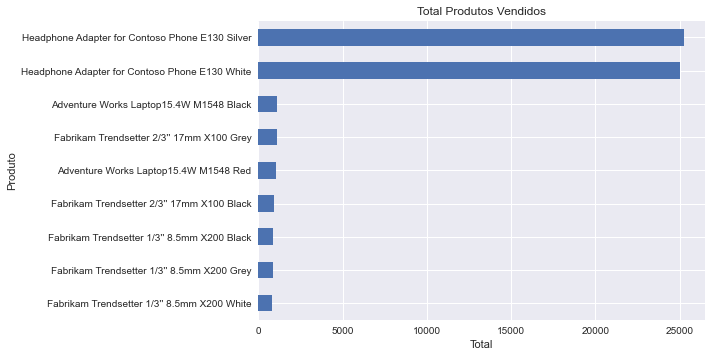

In [26]:
df_aw.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

### Lucro por ano

In [32]:
df_aw.groupby(df_aw["Data Venda"].dt.year)["lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

#### Gráfico de barras

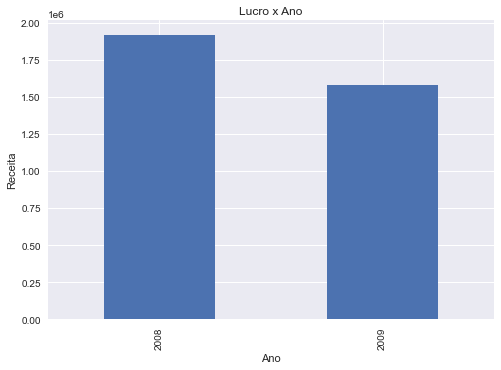

In [28]:
df_aw.groupby(df_aw["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

#### Gráfico de pizza

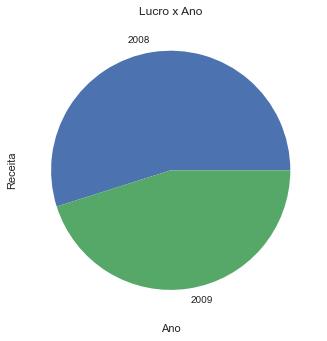

In [29]:
df_aw.groupby(df_aw["Data Venda"].dt.year)["lucro"].sum().plot.pie(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

### Analise das vendas de 2008

In [33]:
df_aw2008 = df_aw[df_aw["Data Venda"].dt.year == 2008]

In [36]:
df_aw2008.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",5


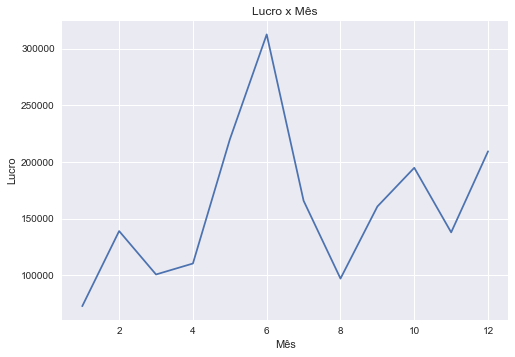

In [40]:
df_aw2008.groupby(df_aw2008["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

### Analise das vendas de 2009

In [37]:
df_aw2009 = df_aw[df_aw["Data Venda"].dt.year == 2009]

In [38]:
df_aw2009.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11


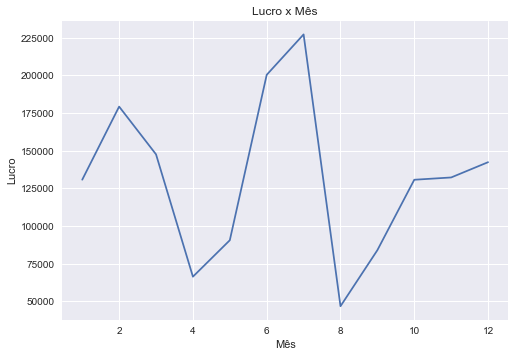

In [42]:
df_aw2009.groupby(df_aw2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

### Lucro por marca

#### Vendas totais

In [52]:
df_aw.groupby("Marca")["lucro"].sum()

Marca
Adventure Works             712,036.24
Contoso                     194,674.95
Fabrikam                  2,591,111.90
Name: lucro, dtype: float64

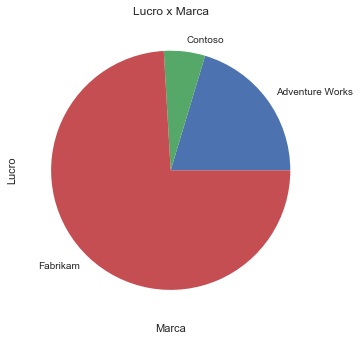

In [53]:
df_aw.groupby("Marca")["lucro"].sum().plot.pie(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

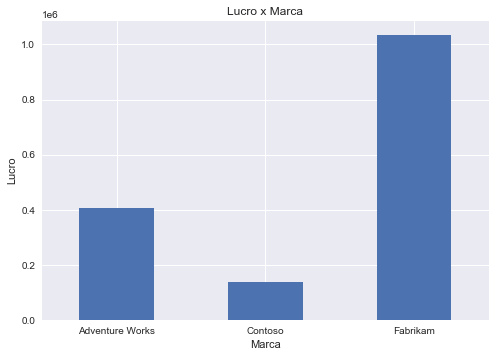

In [47]:
df_aw.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

#### Vendas 2009

In [54]:
df_aw2009.groupby("Marca")["lucro"].sum()

Marca
Adventure Works             405,395.08
Contoso                     138,258.95
Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

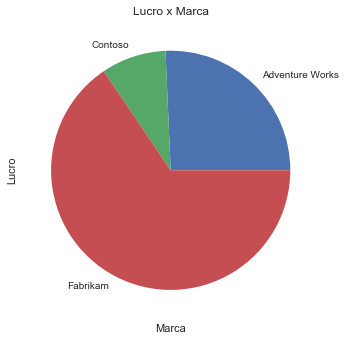

In [55]:
df_aw2009.groupby("Marca")["lucro"].sum().plot.pie(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

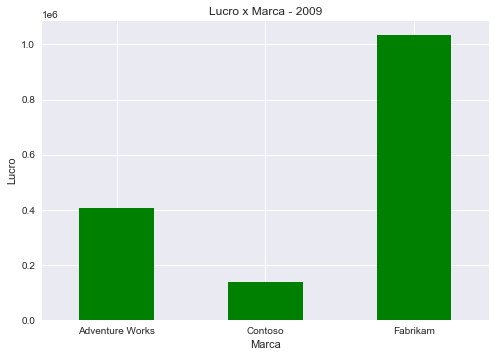

In [50]:
df_aw2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro x Marca - 2009", color='green')
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

#### Vendas 2008

In [56]:
df_aw2008.groupby("Marca")["lucro"].sum()

Marca
Adventure Works             306,641.16
Contoso                      56,416.00
Fabrikam                  1,557,020.55
Name: lucro, dtype: float64

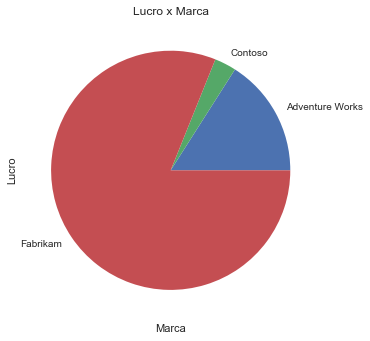

In [57]:
df_aw2008.groupby("Marca")["lucro"].sum().plot.pie(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

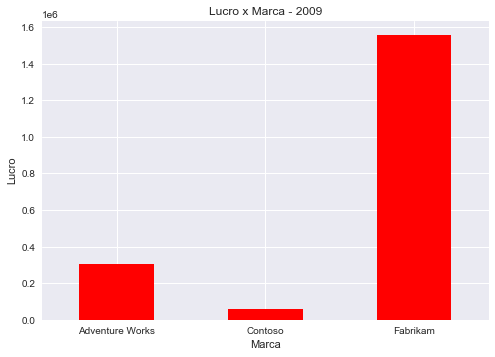

In [51]:
df_aw2008.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro x Marca - 2009", color='red')
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

### Análises do tempo de envio de produtos

#### Descrição das estatistica e histogrma

In [63]:
# Describe
df_aw["Tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

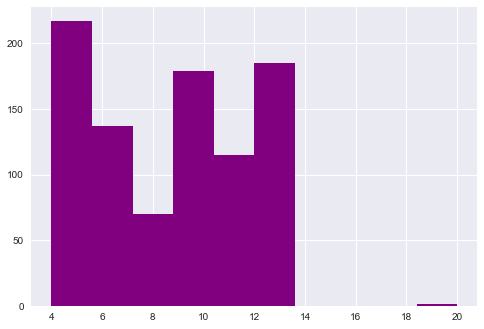

In [70]:
#Histograma
plt.hist(df_aw["Tempo_envio"], color = 'purple');

#### Gráfico bolxspot

Obervação de valores percentis, médias e outliers

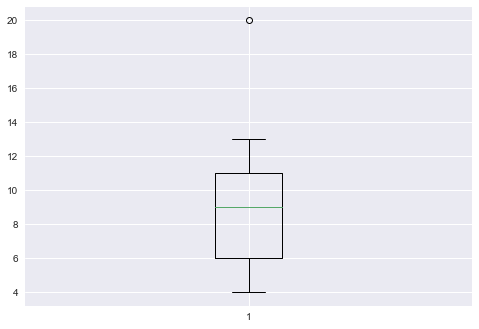

In [60]:
#Gráfico de Boxplot
plt.boxplot(df_aw["Tempo_envio"]);

##### Tempo de envio máximo, minimo e outlier

In [73]:
#Tempo mínimo de envio
df_aw["Tempo_envio"].min()

4

In [74]:
#Tempo máximo de envio
df_aw['Tempo_envio'].max()

20

In [75]:
#Identificando o Outlier
df_aw[df_aw["Tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


## Verificando a correlação entre os dados

In [78]:
df_aw.corr()

,ID Loja,ID Produto,ID Cliente,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,custo,lucro,Tempo_envio
ID Loja,1.00,-0.03,0.88,0.02,0.00,-0.01,0.00,-0.08,-0.06,-0.09,-0.00
ID Produto,-0.03,1.00,0.01,-0.90,-0.71,0.65,-0.16,-0.29,-0.34,-0.24,-0.02
ID Cliente,0.88,0.01,1.00,-0.04,-0.07,0.08,0.12,-0.08,-0.02,-0.11,0.01
Custo Unitário,0.02,-0.90,-0.04,1.00,0.94,-0.74,0.22,0.43,0.37,0.45,0.01
Preço Unitário,0.00,-0.71,-0.07,0.94,1.00,-0.72,0.24,0.49,0.35,0.54,0.01
Quantidade,-0.01,0.65,0.08,-0.74,-0.72,1.00,-0.08,-0.17,-0.05,-0.24,-0.02
Valor Desconto,0.00,-0.16,0.12,0.22,0.24,-0.08,1.00,0.42,0.55,0.32,-0.03
Valor Venda,-0.08,-0.29,-0.08,0.43,0.49,-0.17,0.42,1.00,0.94,0.98,0.02
custo,-0.06,-0.34,-0.02,0.37,0.35,-0.05,0.55,0.94,1.00,0.86,0.02
lucro,-0.09,-0.24,-0.11,0.45,0.54,-0.24,0.32,0.98,0.86,1.00,0.03


### Gerando a matriz de correlação

In [79]:
correlacao = df_aw.corr()

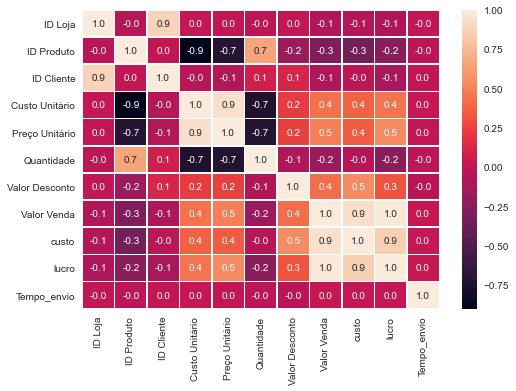

In [80]:
plot = sn.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)

#### Correlação entre custo  e lucro

In [94]:
custo = df_aw["custo"]
lucro = df_aw["lucro"]

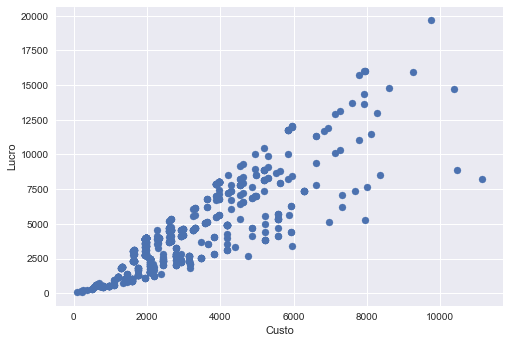

In [95]:
plt.scatter(custo, lucro)
plt.xlabel("Custo")
plt.ylabel("Lucro");
plt.show()

#### Correlação entre custo  e valor de venda

In [96]:
custo = df_aw["custo"]
valorVenda = df_aw["Valor Venda"]

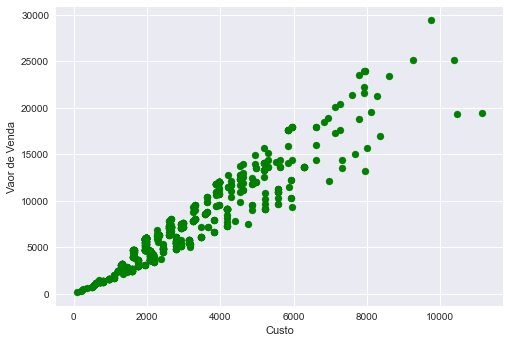

In [98]:
plt.scatter(custo, valorVenda, color='green')
plt.xlabel("Custo")
plt.ylabel("Vaor de Venda");
plt.show()

#### Correlação entre valor de venda e lucro

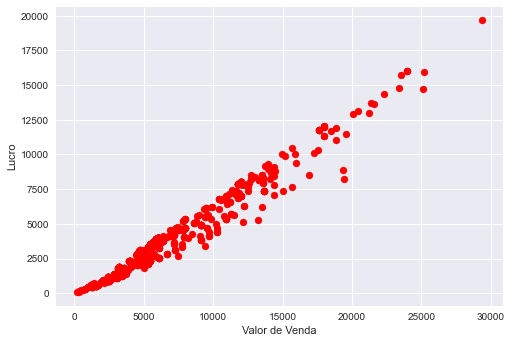

In [102]:
plt.scatter(valorVenda, lucro, color='red')
plt.xlabel("Valor de Venda")
plt.ylabel("Lucro");
plt.show()

## Salvando o dataframe wm csv

In [103]:
df_aw.to_csv("df_vendas_novo.csv", index=False)